In [1]:
# imports
import torch
import math

import numpy as np
import matplotlib.pyplot as plt

from dataset import TrafficSignDataset
from torch.utils.data import random_split
from matplotlib.patches import Rectangle

In [2]:
dataset = TrafficSignDataset("..\data\Train.csv", "..\data")

# randomly split into train and validation, regardless of frame sequences
train, val = random_split(dataset, [math.floor(len(dataset) * 0.9), math.ceil(len(dataset) * 0.1)], generator=torch.Generator().manual_seed(42))

print(len(train), len(val))

35288 3921


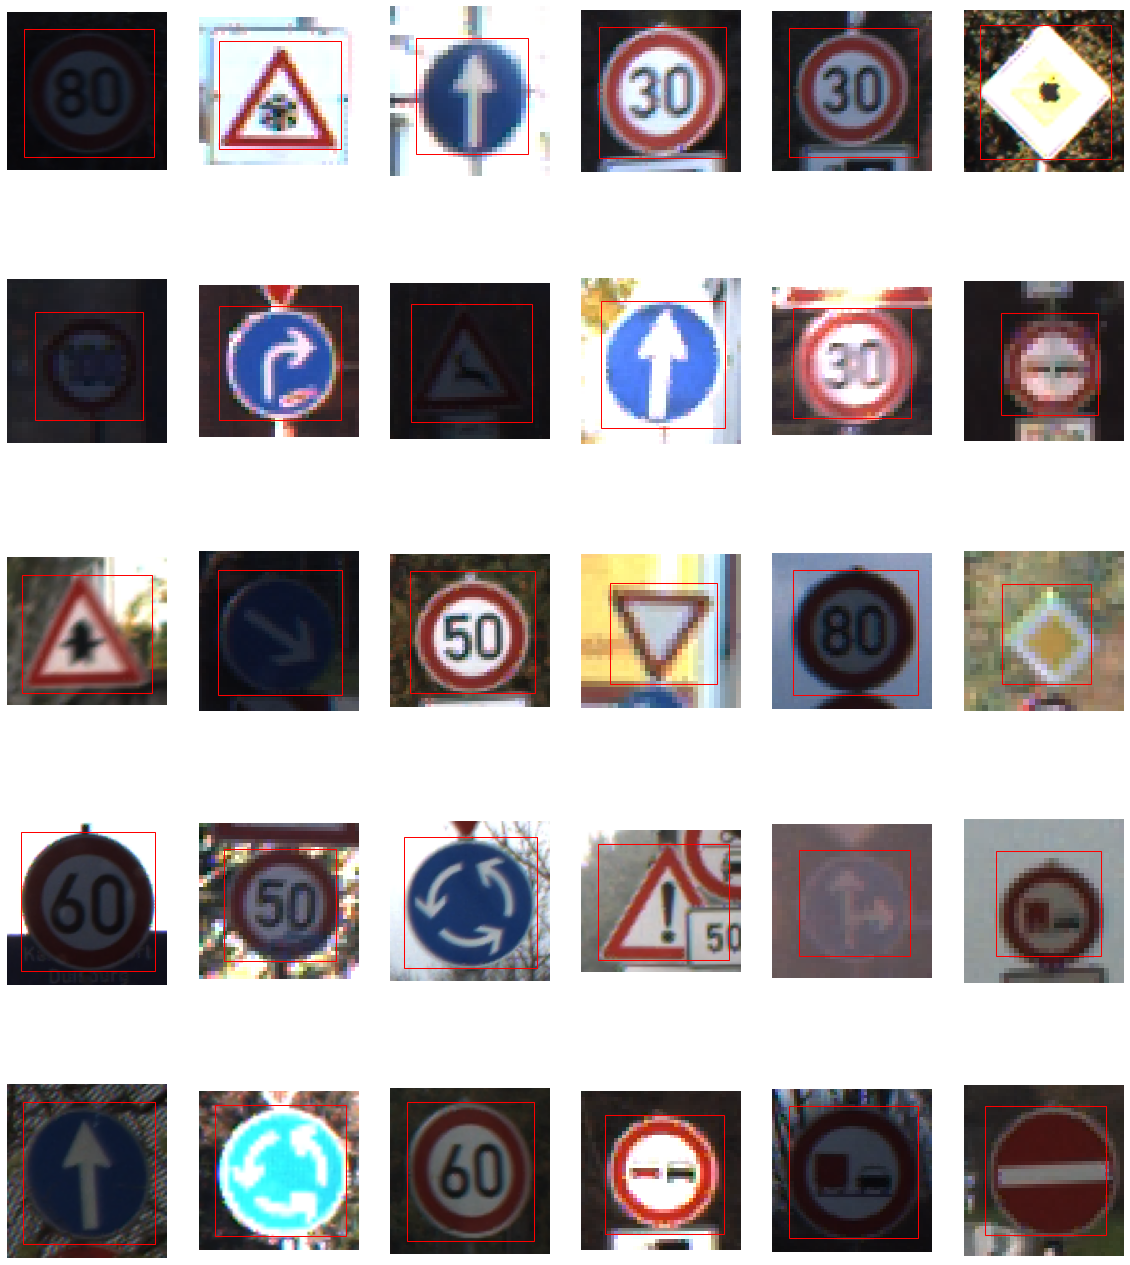

In [3]:
cols, rows = 5, 6
idx = 0 # index of frame sequence

figure = plt.figure(figsize=(20, 24))

for i in range(idx * 30, idx * 30 + 30):
    img, target = train[i]

    figure.add_subplot(cols, rows, i - (idx * 30) + 1)
    plt.imshow(img.permute(1,2,0))
    ax = plt.gca()

    bbox = target["bbox"]
    x = bbox[2]
    y = bbox[3]
    box_width = bbox[4] - x
    box_height = bbox[5] - y

    rect = Rectangle((x,y), box_width, box_height, linewidth=1, edgecolor='r',facecolor='none')

    plt.axis("off")
    ax.add_patch(rect)

plt.show()

<BarContainer object of 43 artists>

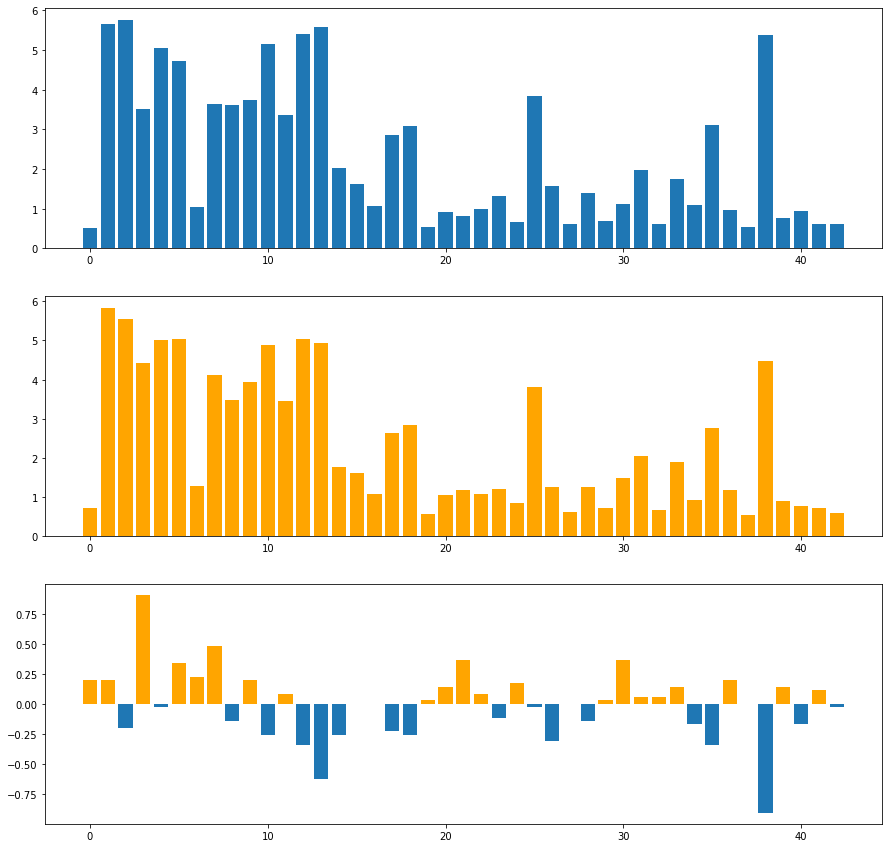

In [6]:
fig, ax = plt.subplots(3,1, figsize=(15,15))

# training data
train_labels, train_counts = np.unique((train.dataset.targets["ClassId"])[train.indices], return_counts=True)
ax[0].bar(train_labels, train_counts / len(train) * 100)

# validation data
val_labels, val_counts = np.unique((val.dataset.targets["ClassId"])[val.indices], return_counts=True)
ax[1].bar(val_labels, val_counts / len(val) * 100, color="orange")


# val - train
diff = val_counts / len(val) - train_counts / len(train)

ax[2].bar(train_labels, diff * 100, color=np.where(diff >= 0, "orange","C0"))


In [5]:
# setup dataloaders